## Logic
* Create a batch of 100 240x240 images.
* Object size should be around 40.
* Generate tensor of images and their corresponding list of lists of list labels object.
* Draw boxes on image and generate it.
* Have a dataset class which can do all of this on the fly.

In [1]:
from chainer import dataset
import numpy as np
import matplotlib.pyplot as plt

class SquaresDataset:
    def __init__(self):
        pass
    
    def load(self):
        pass
    
    def encode_labels(self, labels):
        """
        Encodes a list of labels as y tensor
        
        Args:
            labels: List of list of boxes
            
        Returns:
            gt_loc (n,1): 
        """
        pass
    
    def generate_batch(self, n=100, h=70, w=70, img_h=240, img_w=240):
        """
        Generates a tensor of images with n randomly places squares. Images are of size 240x240.
        
        Args:
            n (int): Batch size
            h (int): Height of each square
            w (int): Height of each square
        
        Returns:
            imgs (n, 3, 240, 240): RGB image tensor
            labels (n, v(n), 4): Numpy array with variable no of boxes per image
        """
        # image tensor
        imgs = np.zeros((n,3,240,240), dtype=np.float32)
        labels = []

        for img in imgs:
            num_boxes = np.random.randint(4,6)

            boxes = []
            for i in xrange(num_boxes):
                tx = np.random.randint(0, 239-w)
                ty = np.random.randint(0, 239-h)
                box = np.array([tx,ty,tx+w,ty+h])
                img[:,ty:ty+h,tx:tx+w] = 1
                boxes.append(box)
            
            labels.append(np.array(boxes))
        
        return imgs, np.array(labels)
    
    def visualize_batch(self, imgs, labels):
        """ 
        Takes a batch of images and labels and plots them
        
        Args:
            imgs (n, 3, 240, 240): Tensor of images
            labels: list of list of boxes/img, each box in (tx, ty, bx, by) format
            
        Returns:
            Nothing, really
        """
        
        for i, img in enumerate(imgs):
            
            boxes = labels[i]
            ax = plt.gca()
            ax.imshow(img[0])

            for box in boxes:
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3] - box[1], fill=False, color='red'))
            plt.show()
    
    def encode(self):
        pass
    
    def get_example(self, i):
        # Here we generate and encode the 
        pass

In [2]:
db = SquaresDataset()

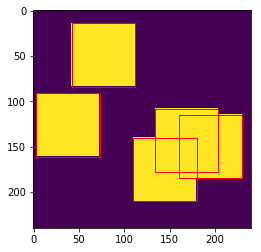

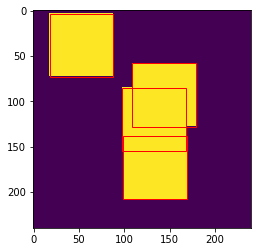

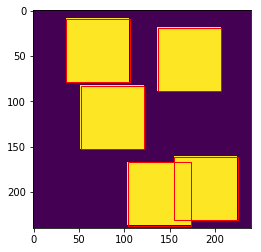

In [3]:
imgs, labels = db.generate_batch(n=3)
db.visualize_batch(imgs, labels)

## Encoding example
* Threshold each image individually and generate a gt_class probaiblity mask.
* Find all the points where the gt_class mask > 0.
* Initialize gt_loc as zeros.a
* For the positive points, find the nearest square box amongst the set of labels.
  * For each box, set its center to average to top left and bottom right.
  * Inititialize closeness as infinity.
  * Match box and set its four channels based on the offset from top left and bottom right.
* Generate selection_mask.
* Calculate classification loss.

In [8]:
""" Encoding code, add here and then move to the """
gt_class = np.zeros((imgs.shape[0], imgs.shape[2], imgs.shape[3]))
gt_class[imgs[:,0,:,:]==1]=1 # Maybe we should consider a more interior region?
gt_class = gt_class.reshape(imgs.shape[0], 1, imgs.shape[2], imgs.shape[3])

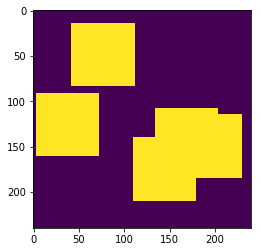

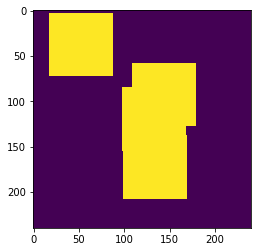

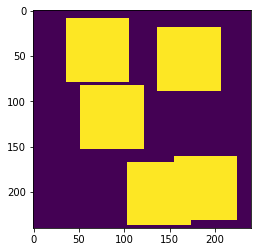

In [9]:
for i in xrange(gt_class.shape[0]):

    plt.imshow(gt_class[i,0])
    plt.show()

Ok we are able to generate the gt_class probability tensor

In [10]:
labels[2].shape

(5, 4)

In [11]:
for gt_c, boxes in zip(gt_class, labels):
    print(gt_c, boxes)
    """ Matching code here """

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]), array([[110, 140, 180, 210],
       [  3,  91,  73, 161],
       [160, 115, 230, 185],
       [ 42,  14, 112,  84],
       [134, 108, 204, 178]]))
(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]), array([[ 99, 138, 169, 208],
       [109,  58, 179, 128],
       [ 18,   3,  88,  73],
       [ 98,  85, 168, 155]]))
(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [

In [12]:
!git diff

diff --git a/DatasetTensorCreator.ipynb b/DatasetTensorCreator.ipynb
index 13c380d..737afc3 100644
--- a/DatasetTensorCreator.ipynb
+++ b/DatasetTensorCreator.ipynb
@@ -14,7 +14,7 @@
   },
   {
    "cell_type": "code",
-   "execution_count": 105,
+   "execution_count": 1,
    "metadata": {
     "collapsed": true
    },
@@ -61,7 +61,7 @@
     "        labels = []\n",
     "\n",
     "        for img in imgs:\n",
-    "            num_boxes = np.random.randint(2,4)\n",
+    "            num_boxes = np.random.randint(4,6)\n",
     "\n",
     "            boxes = []\n",
     "            for i in xrange(num_boxes):\n",
@@ -107,7 +107,7 @@
   },
   {
    "cell_type": "code",
-   "execution_count": 106,
+   "execution_count": 2,
    "metadata": {
     "collapsed": true
    },
@@ -118,14 +118,14 @@
   },
   {
    "cell_type": "code",
-   "execution_count": 107,
+   "execution_count": 3,
    "metadata": {},
    "outputs": [
     {
      "data": {
-      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAQ

+      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYwAAAEVCAYAAADzUNLBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAHwlJREFUeJzt3Xm4XHWd5/H3h6wiaABlkYhxwQVGBDuyCK0BRFFRMs8w\ngGNrsPGhex61obVV7Hba0O3a2oKONkoLk2irgUYg0dFBDInK0mgQFAxbpEOzBKIsstgEAt/54/er\n3OLk1L2/W7eqTuXm83qe+1TVWb/3bN/zW06VIgIzM7OxbNN0AGZmtmVwwjAzsyJOGGZmVsQJw8zM\nijhhmJlZEScMMzMr4oRRQ9JKSe5vPEGSFkoKSfOGIJZdJS2WdIekJ3Jcs/K4Z0j6oqS1kjbmcfs2\nHbNtGfJxs7bpOAahKGHkEygk3SZpZodp1uZppvY2xN6TtCjHOqfpWGxgFgHvAH4MfBw4DXg0j/sH\n4H3AdcCn8ri7+xlMr5KppFmSPijpm5JWtyW8140x3xRJfynpV5L+U9J9kr4v6dUTiaffyzaQ9KeS\nLpK0RtKDkh6RdIOkf5b0klHmmy3pHEl3SdqQr9lnSNqhdN3jvbjvAZwCfHqc821p3gls23QQ1huS\npgNHAD+KiLfXTHIUcHNEvGWwkfXEHFLCA7gD+B2wy2gzSBKwBDgGuAn4ErAjcBzwE0n/LSKWdhNM\nP5dtm/wJsBtwFenG5klgb+BdwDslzY+IH7TPIOmFwBXAzsBS4EZgf+Bk4EhJB0fEvWOuOSLG/AMC\nuA+4F3gAeFbNNGvzdFNLltnkH+luM4A5Tccymf+AhXk7z2s4jj1yHIs6jH8SWLklbhtgB+BwYMf8\nuXVsv26Ued6Wp7kcmNk2/FXABmA9sH2X8fRt2cP6l699awe4vpkdhh+Rt/3qmnEX53Hvqwz/fB7+\nlaJ1FwYYpLuXU/L7/91ho9UmDOAA4HxSNnwMuB34KvC

+      "\u001b+\u001b[m\u001b   \"cell_type\": \"code\",\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"execution_count\": null,\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"metadata\": {\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b    \"collapsed\": true\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   },\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"outputs\": [],\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"source\": []\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b  },\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b  {\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"cell_type\": \"code\",\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"execution_count\": null,\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"metadata\": {\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b    \"collapsed\": true\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   },\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"outputs\": [],\u001b[m\r\n",
+      "\u001b+\u001b[m\u001b   \"source\": []\u001b[m\r\n",
+      "   }\